# Problem Statement 1(book.csv)

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d1 = pd.read_csv("book.csv")
d1

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
d1.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


# Apriori Algorithm

In [5]:
frequent_itemsets = apriori(d1, min_support = 0.05,use_colnames=True,max_len = 5)
frequent_itemsets

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(CookBks, GeogBks, YouthBks, DoItYBks)"
96,0.0560,"(CookBks, GeogBks, YouthBks, ArtBks)"
97,0.0650,"(GeogBks, CookBks, DoItYBks, ArtBks)"
98,0.0510,"(GeogBks, YouthBks, DoItYBks, CookBks, ChildBks)"


In [6]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=1.0)
rules.head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.0,2.320186,0.064582,inf,0.641850
1,"(ItalCook, ChildBks)",(CookBks),0.0850,0.431,0.0850,1.0,2.320186,0.048365,inf,0.621858
2,"(ItalCook, YouthBks)",(CookBks),0.0590,0.431,0.0590,1.0,2.320186,0.033571,inf,0.604676
3,"(ItalCook, DoItYBks)",(CookBks),0.0585,0.431,0.0585,1.0,2.320186,0.033287,inf,0.604355
4,"(ItalCook, ArtBks)",(CookBks),0.0565,0.431,0.0565,1.0,2.320186,0.032148,inf,0.603074
5,"(GeogBks, ItalCook)",(CookBks),0.0640,0.431,0.0640,1.0,2.320186,0.036416,inf,0.607906
6,"(GeogBks, ItalCook, ChildBks)",(CookBks),0.0525,0.431,0.0525,1.0,2.320186,0.029872,inf,0.600528


In [7]:
rules.sort_values(['confidence', 'lift'], ascending =[False, False])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.0,2.320186,0.064582,inf,0.641850
1,"(ItalCook, ChildBks)",(CookBks),0.0850,0.431,0.0850,1.0,2.320186,0.048365,inf,0.621858
2,"(ItalCook, YouthBks)",(CookBks),0.0590,0.431,0.0590,1.0,2.320186,0.033571,inf,0.604676
3,"(ItalCook, DoItYBks)",(CookBks),0.0585,0.431,0.0585,1.0,2.320186,0.033287,inf,0.604355
4,"(ItalCook, ArtBks)",(CookBks),0.0565,0.431,0.0565,1.0,2.320186,0.032148,inf,0.603074
5,"(GeogBks, ItalCook)",(CookBks),0.0640,0.431,0.0640,1.0,2.320186,0.036416,inf,0.607906
6,"(GeogBks, ItalCook, ChildBks)",(CookBks),0.0525,0.431,0.0525,1.0,2.320186,0.029872,inf,0.600528


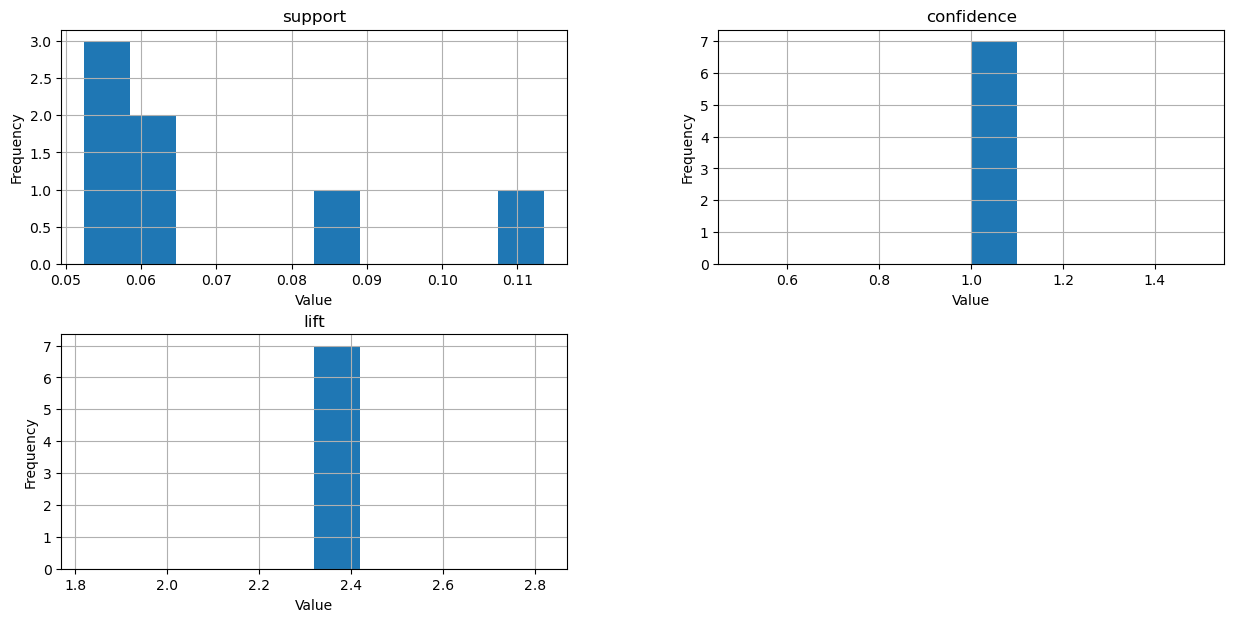

In [8]:
import matplotlib.pyplot as plt
hist = rules[['support','confidence','lift']].hist(figsize=(15,7))
# Add x-axis and y-axis labels
for ax in hist.ravel():
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.show()

# Function to generate association rules by Eliminating redundant rules and visualize 

In [10]:
def generate_and_visualize_rules(support, confidence, maxlen):
    # Apply Apriori algorithm
    frequent_itemsets = apriori(d1, min_support=support, use_colnames=True,max_len=maxlen)
    
    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
    
    # Eliminate redundant rules
    for i in range(len(rules)):
        for j in range(i+1, len(rules)):
            if rules.iloc[i]['consequents'] == rules.iloc[j]['consequents']:
                if set(rules.iloc[i]['antecedents']).issubset(set(rules.iloc[j]['antecedents'])):
                    rules.drop(i, inplace=True)
                    break
    # Visualize the rules
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='support', y='confidence', size='lift', data=rules)
    plt.title(f'Association Rules (Min Support={support}, Min Confidence={confidence}, Min Length={min_len})')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.show()

    return rules

In [11]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.0,2.320186,0.064582,inf,0.641850
1,"(ItalCook, ChildBks)",(CookBks),0.0850,0.431,0.0850,1.0,2.320186,0.048365,inf,0.621858
2,"(ItalCook, YouthBks)",(CookBks),0.0590,0.431,0.0590,1.0,2.320186,0.033571,inf,0.604676
3,"(ItalCook, DoItYBks)",(CookBks),0.0585,0.431,0.0585,1.0,2.320186,0.033287,inf,0.604355
4,"(ItalCook, ArtBks)",(CookBks),0.0565,0.431,0.0565,1.0,2.320186,0.032148,inf,0.603074
5,"(GeogBks, ItalCook)",(CookBks),0.0640,0.431,0.0640,1.0,2.320186,0.036416,inf,0.607906
6,"(GeogBks, ItalCook, ChildBks)",(CookBks),0.0525,0.431,0.0525,1.0,2.320186,0.029872,inf,0.600528


In [12]:
rules.iloc[:]['antecedents']

0                       (ItalCook)
1             (ItalCook, ChildBks)
2             (ItalCook, YouthBks)
3             (ItalCook, DoItYBks)
4               (ItalCook, ArtBks)
5              (GeogBks, ItalCook)
6    (GeogBks, ItalCook, ChildBks)
Name: antecedents, dtype: object

# Task 1: Try different values of support and confidence with different minimum length in apriori algorithm

Text(0.5, 1.0, 'Association Rules (Min Support=0.05, Min Confidence=0.5, Min Length=2)')

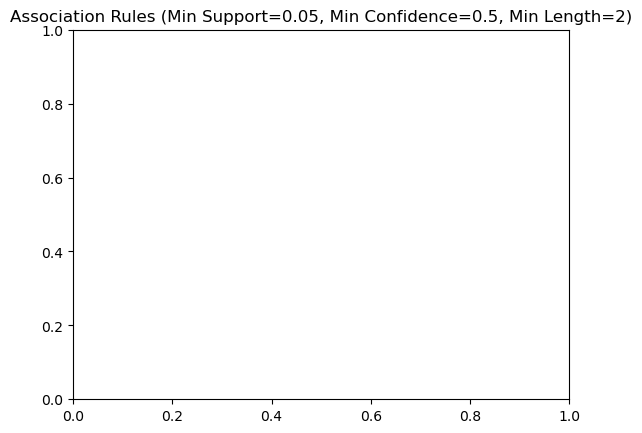

In [24]:
plt.title(f'Association Rules (Min Support={support}, Min Confidence={confidence}, Min Length={mini})')

# Problem Statement 2(my_movies.csv)

In [29]:
d2 = pd.read_csv('my_movies.csv')
d2

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [30]:
d2.isnull().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [31]:
d2.shape

(10, 15)

In [32]:
d2 = d2.drop(columns = ['V1','V2','V3','V4','V5'])

In [33]:
d2.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Apriori Algorithm

In [34]:
frequent_itemsets = apriori(d2, min_support = 0.05,use_colnames=True,max_len = 5)
frequent_itemsets

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [35]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=1.0)
rules.head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,0.444444
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf,0.500000
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf,0.750000
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf,0.333333
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf,0.333333
5,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.000000,0.16,inf,1.000000
6,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.000000,0.16,inf,1.000000
7,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.0,5.000000,0.08,inf,0.888889
8,(Braveheart),(Patriot),0.1,0.6,0.1,1.0,1.666667,0.04,inf,0.444444
9,(LOTR),(Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf,0.888889


In [36]:
rules.sort_values(['confidence', 'lift'], ascending =[False, False])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
35,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
38,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
49,"(Sixth Sense, Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
53,"(Sixth Sense, LOTR)","(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
54,"(Green Mile, Gladiator)","(Sixth Sense, LOTR)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
10,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf,0.500000
11,"(Sixth Sense, LOTR)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf,0.333333
33,"(Braveheart, Patriot)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf,0.333333
36,"(Green Mile, LOTR)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf,0.333333


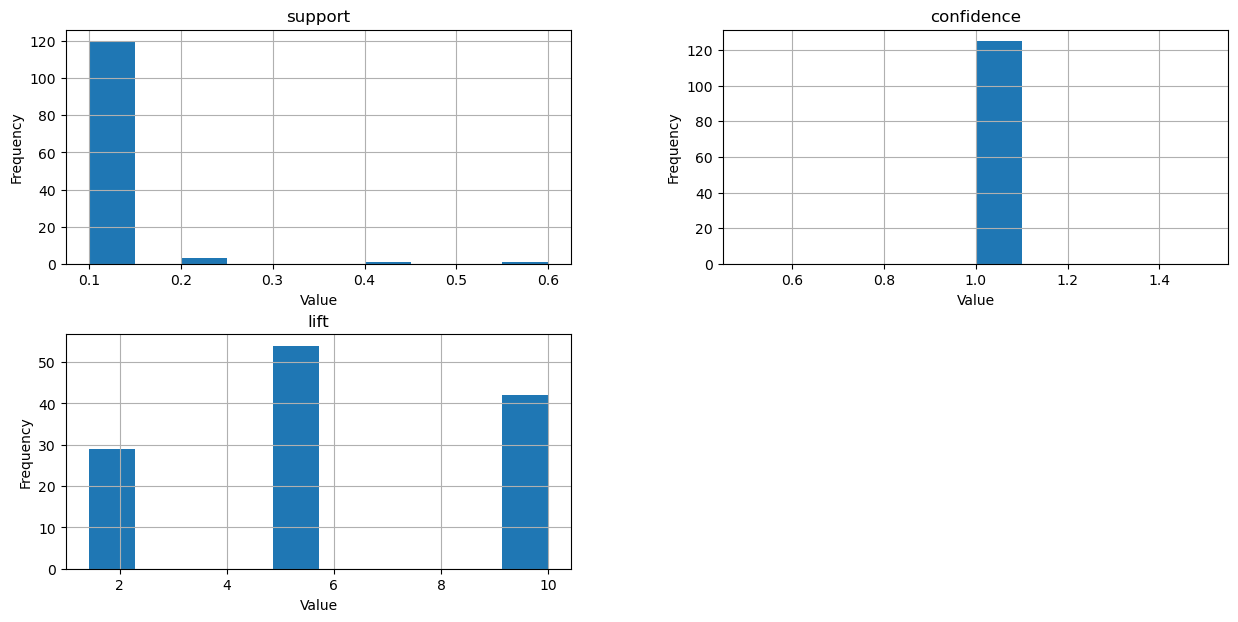

In [37]:
import matplotlib.pyplot as plt
hist = rules[['support','confidence','lift']].hist(figsize=(15,7))
# Add x-axis and y-axis labels
for ax in hist.ravel():
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
plt.show()

# Function to generate association rules by Eliminating redundant rules and visualize 

In [38]:
def generate_and_visualize_rules(support, confidence, maxlen):
    # Apply Apriori algorithm
    frequent_itemsets = apriori(d2, min_support=support, use_colnames=True,max_len=maxlen)
    
    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
    
    # Eliminate redundant rules
    for i in range(len(rules)):
        for j in range(i+1, len(rules)):
            if rules.iloc[i]['consequents'] == rules.iloc[j]['consequents']:
                if set(rules.iloc[i]['antecedents']).issubset(set(rules.iloc[j]['antecedents'])):
                    rules.drop(i, inplace=True)
                    break
    # Visualize the rules
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='support', y='confidence', size='lift', data=rules)
    plt.title(f'Association Rules (Min Support={support}, Min Confidence={confidence}, Min Length={min_len})')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.show()

    return rules

In [39]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf,0.444444
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf,0.500000
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf,0.750000
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf,0.333333
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf,0.333333
...,...,...,...,...,...,...,...,...,...,...
120,"(Harry Potter1, LOTR2)","(Sixth Sense, Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
121,"(Green Mile, LOTR1)","(Sixth Sense, Harry Potter1, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
122,"(Green Mile, LOTR2)","(Sixth Sense, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
123,"(Sixth Sense, LOTR1)","(Harry Potter1, Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000


In [40]:
rules.iloc[:]['antecedents']

0                      (LOTR)
1                (Green Mile)
2                   (Patriot)
3                      (LOTR)
4                (Braveheart)
                ...          
120    (Harry Potter1, LOTR2)
121       (Green Mile, LOTR1)
122       (Green Mile, LOTR2)
123      (Sixth Sense, LOTR1)
124      (Sixth Sense, LOTR2)
Name: antecedents, Length: 125, dtype: object

# Try different values of support and confidence with different minimum length in apriori algorithm

Text(0.5, 1.0, 'Association Rules (Min Support=0.05, Min Confidence=0.5, Min Length=2)')

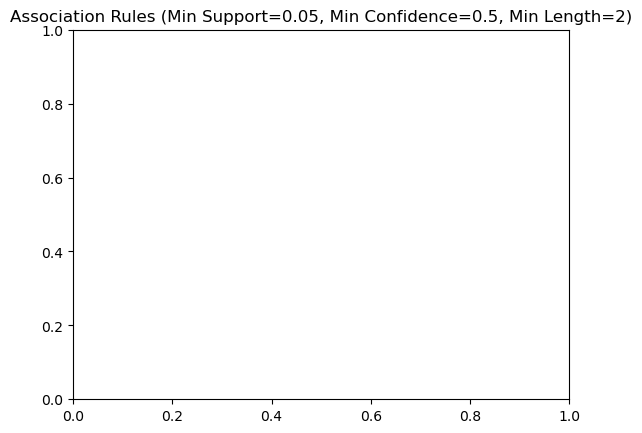

In [42]:
plt.title(f'Association Rules (Min Support={support}, Min Confidence={confidence}, Min Length={mini})')